In [1]:
# Set up the parameters for the notebook
csvpathfull = "C:\\Users\\cberd\\Desktop\\Master\\Modulo5DataAnalitics\\Temario\\Leccion 5\\Datasets\\San Francisco Dataset\\Fire_Department_and_Emergency_Medical_Services_Dispatched_Calls_for_Service_20241230.csv"
csvpath1year = "C:\\Users\\cberd\\Desktop\\Master\\Modulo5DataAnalitics\\Temario\\Leccion 5\\Datasets\\San Francisco Dataset\\Fire_Department_Calls_for_Service_1year.csv"
outcsvpath = "C:\\Users\\cberd\\Desktop\\Master\\Modulo5DataAnalitics\\Temario\\Leccion 5\\Datasets\\San Francisco Dataset\\Fire_Department_Calls_for_Service_1year.csv"
# Choose whether to use the full dataset or only the last year
csvpath=csvpath1year

In [3]:
# Let us start reading the CSV
import pandas as pd
import numpy as np
df_csv = pd.read_csv(csvpath, sep=",", low_memory=False)

In [4]:
# And calculate the Time to Scene
df_csv['TimeReceivedOnScene'] = pd.to_datetime(df_csv['On Scene DtTm'],format='%m/%d/%Y %I:%M:%S %p') - pd.to_datetime(df_csv['Received DtTm'],format='%m/%d/%Y %I:%M:%S %p')
df_csv=df_csv[df_csv.TimeReceivedOnScene > pd.to_timedelta('0')]
# We need to transform the time to minutes, hours or days in order to be able to plot it 
df_csv['TimeReceivedOnSceneInMinutes'] = df_csv['TimeReceivedOnScene']/np.timedelta64(1,'m')

<Axes: xlabel='Unit ID', ylabel='TimeReceivedOnSceneInMinutes'>

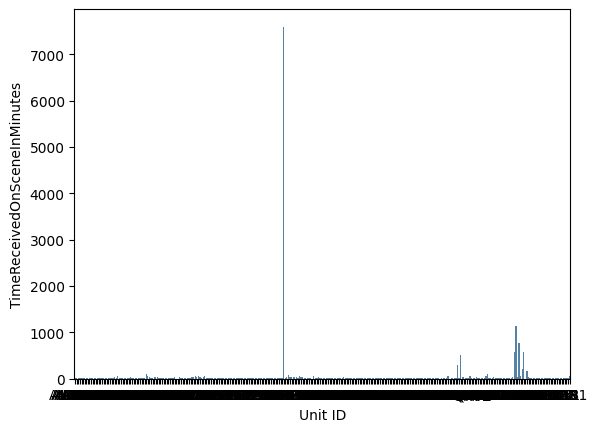

In [5]:
# Let's analyze the aim of our first visualization:
# Goal: Compare/Rank unit performance
# Suggested: A) Bar chart B) Bubble graph. Since right now we only have one axis (Unit ID), we use A)
import seaborn as sns

# First, we calculate the values we are looking for
# If we had a database, we could obtain these directly from a database query
values=df_csv.groupby(['Unit ID'],as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})
# Now, we create the chart, avoiding multiple colors by setting color="steelblue"
barplot = sns.barplot(data=values,x='Unit ID',y='TimeReceivedOnSceneInMinutes',color="steelblue")
barplot

<Axes: xlabel='Unit ID', ylabel='TimeReceivedOnSceneInMinutes'>

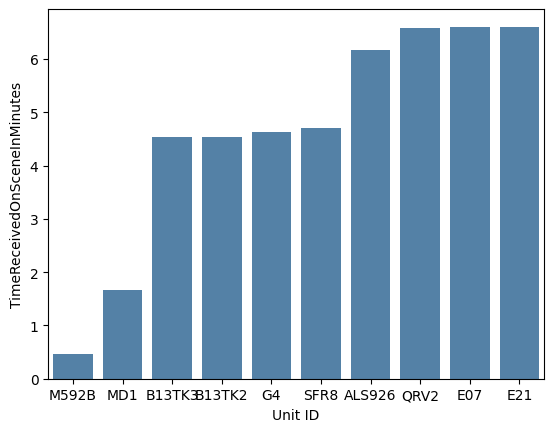

In [7]:
# We can see that many units have a significantly higher time than the mean. We can do several things:
# Filter, Group or Analyze the overall distribution
# Let us start with filtering

barplot = sns.barplot(data=values.sort_values('TimeReceivedOnSceneInMinutes').head(10),x='Unit ID',y='TimeReceivedOnSceneInMinutes',color="steelblue")
barplot

<Axes: xlabel='Unit ID', ylabel='TimeReceivedOnSceneInMinutes'>

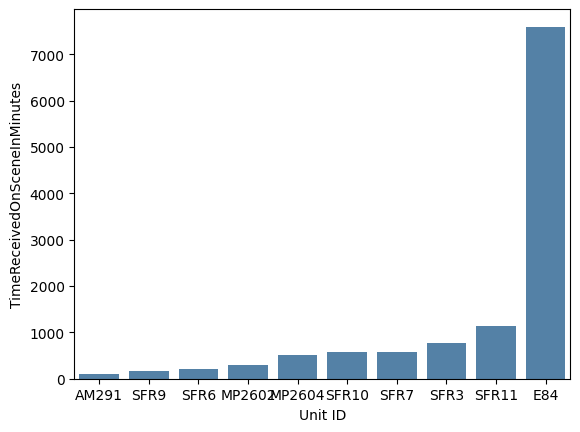

In [9]:
barplot = sns.barplot(data=values.sort_values('TimeReceivedOnSceneInMinutes').tail(10),x='Unit ID',y='TimeReceivedOnSceneInMinutes',color="steelblue")
barplot

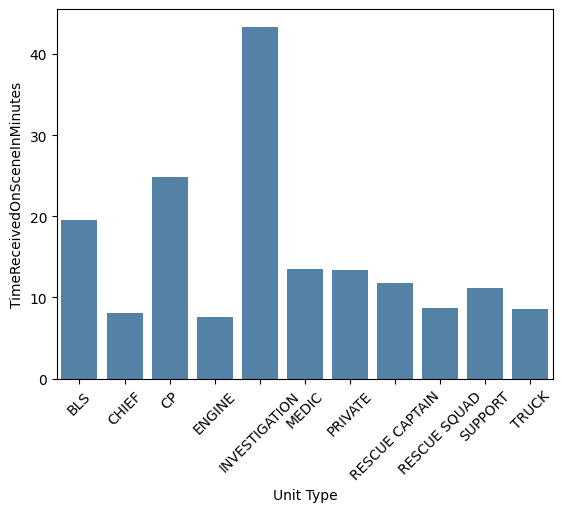

In [10]:
# After we have tried filtering, let's try out grouping 
# By Unit Type
# since names are relatively large, we use .tick_params(axis='x',rotation=value) to rotate the labels

valuesbyUnitType=df_csv.groupby(['Unit Type'],as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})
barplot = sns.barplot(data=valuesbyUnitType,x='Unit Type',y='TimeReceivedOnSceneInMinutes',color="steelblue").tick_params(axis='x', rotation=45)
barplot

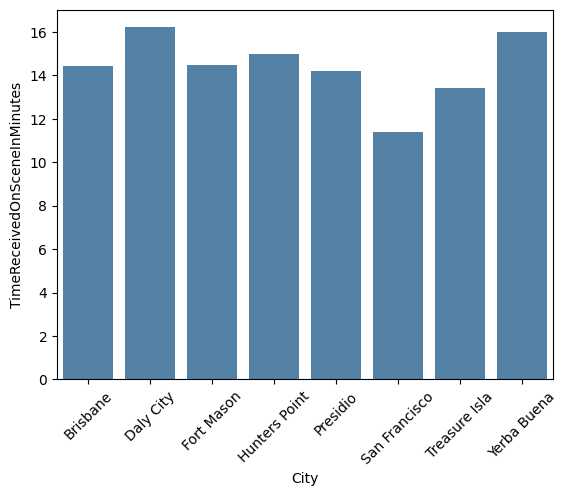

In [15]:
# By City

valuesbyCity=df_csv.groupby(['City'],as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})
barplot = sns.barplot(data=valuesbyCity,x='City',y='TimeReceivedOnSceneInMinutes',color="steelblue").tick_params(axis='x', rotation=45)
barplot

<Axes: xlabel='Priority', ylabel='TimeReceivedOnSceneInMinutes'>

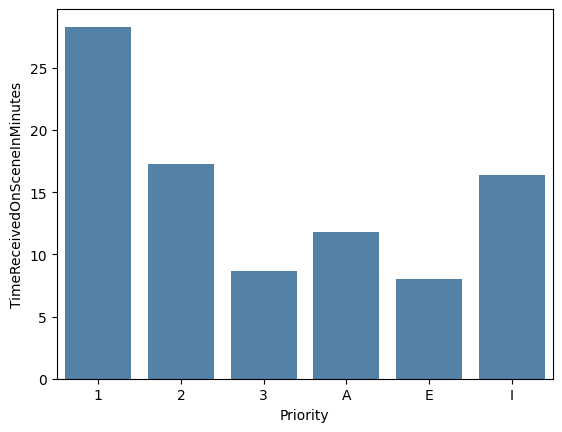

In [17]:
# By Priority of the call

valuesbyPriority=df_csv.groupby(['Priority'],as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})
barplot = sns.barplot(data=valuesbyPriority,x='Priority',y='TimeReceivedOnSceneInMinutes',color="steelblue")
barplot

<Axes: xlabel='TimeReceivedOnSceneInMinutes', ylabel='Count'>

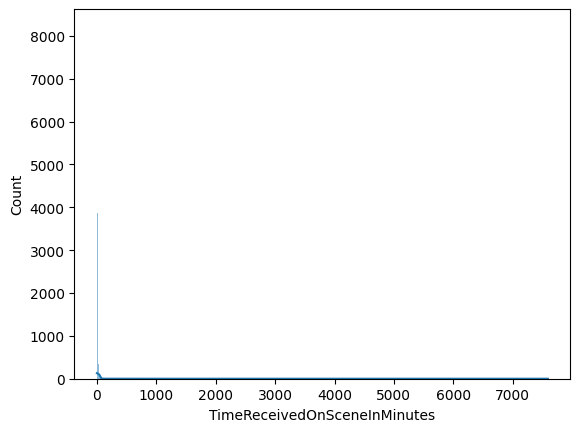

In [19]:
# If we wish to analyze the overall distribution we can use a histogram (histplot)
# using the kde=True option we will obtain the distribution curve according to the frequency of values
sns.histplot(df_csv['TimeReceivedOnSceneInMinutes'],kde=True)

In [20]:
# Does the average time to arrive change across the year?
# Goal: Analyze evolution across time
# Suggested: Line chart
# First we need to group according to the week or month:
df_csv['Call Month']=pd.to_datetime(df_csv['Call Date'],format='%m/%d/%Y').dt.month
             
# Then we can aggregate
lineChartOverall = df_csv.groupby(df_csv['Call Month'], as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})   

(0.0, 13.0)

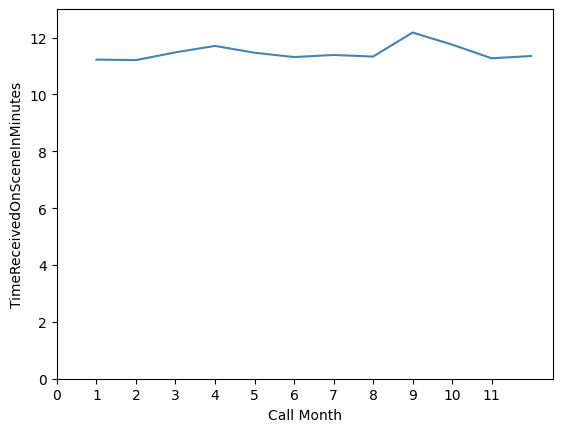

In [21]:
# Finally, we plot the line chart.
# If we want all elements to appear on the x axis we need to set the xticks
import matplotlib.pyplot as plt
sns.lineplot(data=lineChartOverall,x='Call Month',y='TimeReceivedOnSceneInMinutes',color="steelblue")\
.set_xticks(range(len(lineChartOverall)))
# To avoid distorsion we can alter the Y axis limits
plt.ylim(0,13)

In [22]:
# Alternatively, we can aggregate by Unit Type
lineChartUnitType = df_csv.groupby(['Unit Type','Call Month'], as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})   

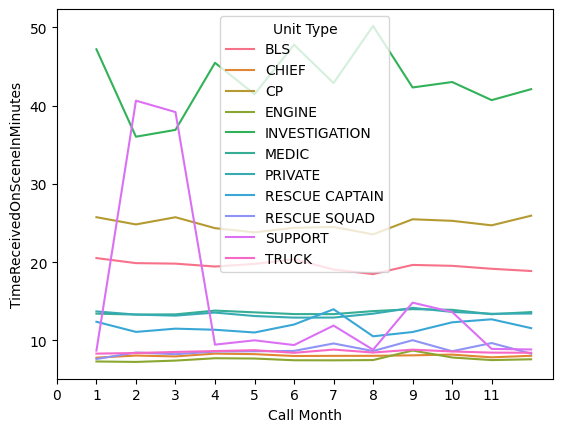

In [23]:
sns.lineplot(data=lineChartUnitType,x='Call Month',y='TimeReceivedOnSceneInMinutes',hue='Unit Type').set_xticks(range(len(lineChartOverall)))

In [24]:
# Thid question: Have support units become quicker in all cities?
# First we will need to filter the dataframe to support-type units only

df_onlysupport = df_csv.query("`Unit Type` == 'SUPPORT'")

# Then, we can calculate the aggregates for each Unit ID, City and Call Month
bubblegraphsupport = df_onlysupport.groupby(['Unit ID','City','Call Month'], as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})   

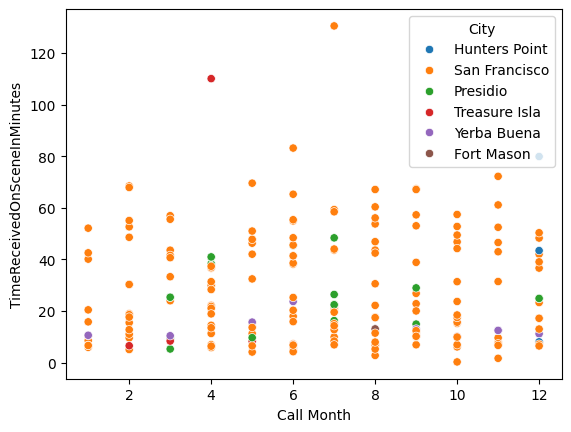

In [25]:
bubbleplot = sns.scatterplot(data=bubblegraphsupport,x='Call Month',y='TimeReceivedOnSceneInMinutes', hue='City')

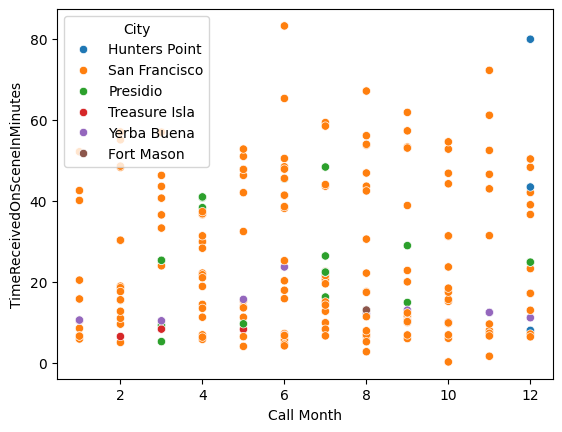

In [26]:
bubblegraphsupportlessthan100 = df_onlysupport.query('TimeReceivedOnSceneInMinutes < 100').groupby(['Unit ID','City','Call Month'], as_index=False).agg({'TimeReceivedOnSceneInMinutes': pd.Series.mean})  
bubbleplot = sns.scatterplot(data=bubblegraphsupportlessthan100,x='Call Month',y='TimeReceivedOnSceneInMinutes', hue='City')

In [27]:
bubblegraphunittypeneighborhood = df_csv.groupby(['Unit Type','Neighborhooods - Analysis Boundaries'],as_index=False).agg\
({'TimeReceivedOnSceneInMinutes': pd.Series.mean,'Call Number':pd.Series.nunique})

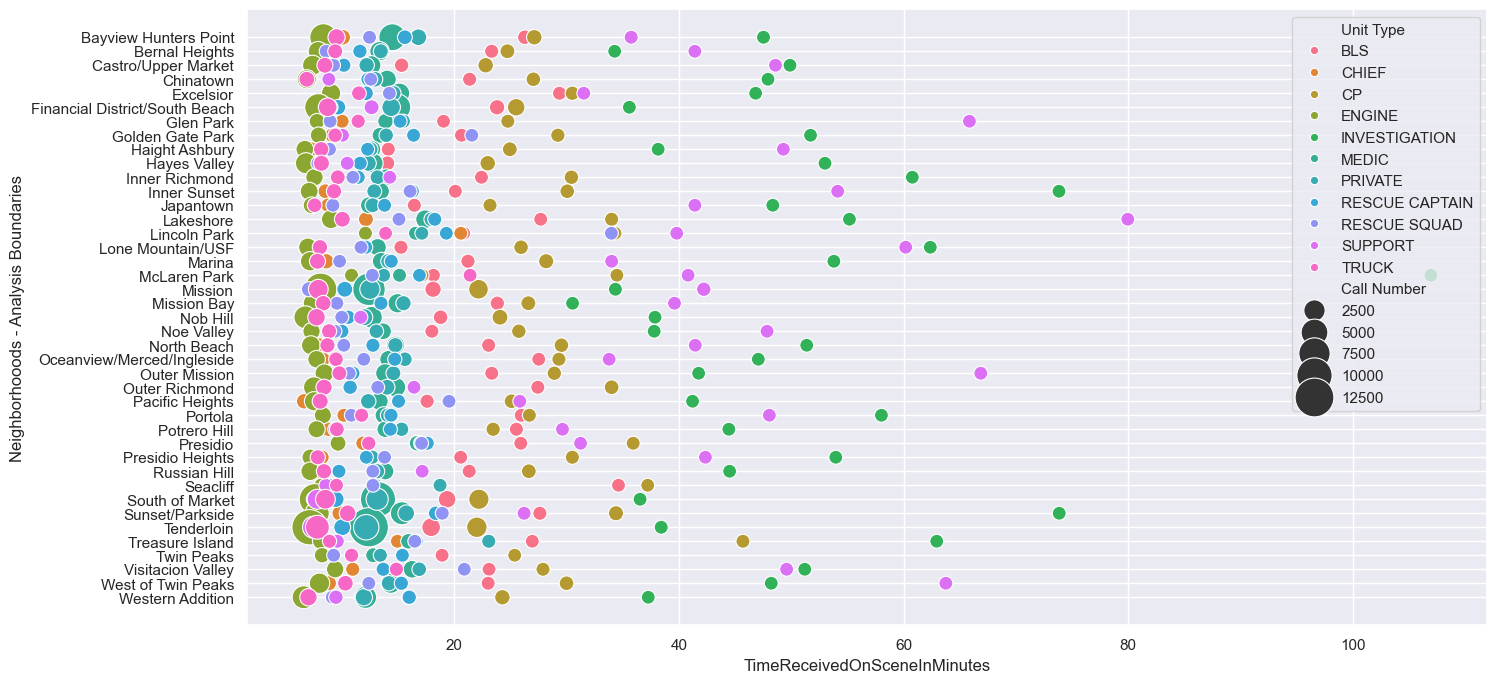

In [28]:
sns.set(rc={"figure.figsize":(16, 8)})
bubbleplot = sns.scatterplot(data=bubblegraphunittypeneighborhood,x='TimeReceivedOnSceneInMinutes',y='Neighborhooods - Analysis Boundaries', \
                             size='Call Number',hue='Unit Type', sizes=(100,800))